<a href="https://colab.research.google.com/github/CrisGiacomazzi/ChurnProject/blob/main/Churn_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [171]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression

In [111]:
churn_dataset = pd.read_csv ('/content/Churn_Modelling.csv')

In [112]:
churn_dataset.shape

(10000, 14)

In [113]:
churn_dataset.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

#Cleanning Step

In [114]:
churn_dataset = churn_dataset.drop(['Surname', 'RowNumber', 'CustomerId'], axis=1)

In [115]:
churn_dataset.duplicated().sum()

0

In [116]:
churn_dataset.isnull().sum()

,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0


In [117]:
churn_dataset = churn_dataset.rename(columns={'Exited': 'Churn'})

##EDA - Exploratory Data Analysis

In [118]:
churn_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [119]:
churn_dataset.tail()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1
9999,792,France,Female,28,4,130142.79,1,1,0,38190.78,0


In [120]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [121]:
churn_dataset.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


##Visual Exploration

Text(0.5, 1.0, 'Proportion of Churn')

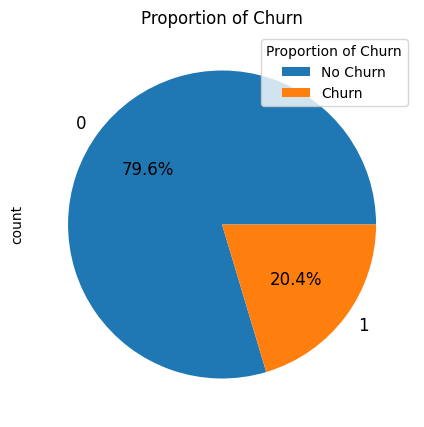

In [122]:
# Proportion of Churn
churn_dataset.Churn.value_counts().plot.pie(autopct='%1.1f%%', figsize=(5, 5), fontsize = 12)
blue = '#4c72b0'
orange = '#ff9f40'
colors = [blue, orange]
plt.legend(labels=['No Churn', 'Churn'], title="Proportion of Churn")
plt.title("Proportion of Churn")

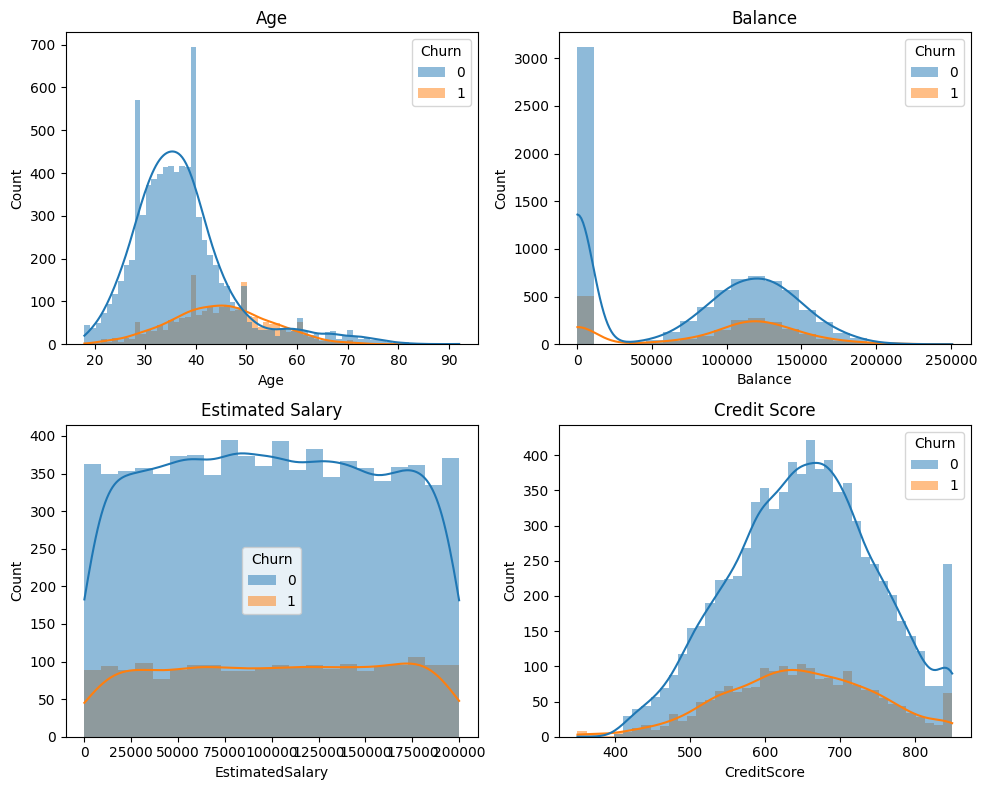

In [123]:
# Numerical Variables - distribution
fig, ax = plt.subplots(2, 2, figsize=(10, 8))

sns.histplot(data=churn_dataset, x='Age', hue='Churn', kde=True, linewidth=0, ax=ax[0, 0]).set_title('Age')
sns.histplot(data=churn_dataset, x='Balance', hue='Churn', kde=True, linewidth=0, ax=ax[0, 1]).set_title('Balance')
sns.histplot(data=churn_dataset, x='EstimatedSalary', hue='Churn', kde=True, linewidth=0, ax=ax[1, 0]).set_title('Estimated Salary')
sns.histplot(data=churn_dataset, x='CreditScore', hue='Churn', kde=True, linewidth=0, ax=ax[1, 1]).set_title('Credit Score')


plt.tight_layout()
plt.show()

[0]No churn
[1]Churn

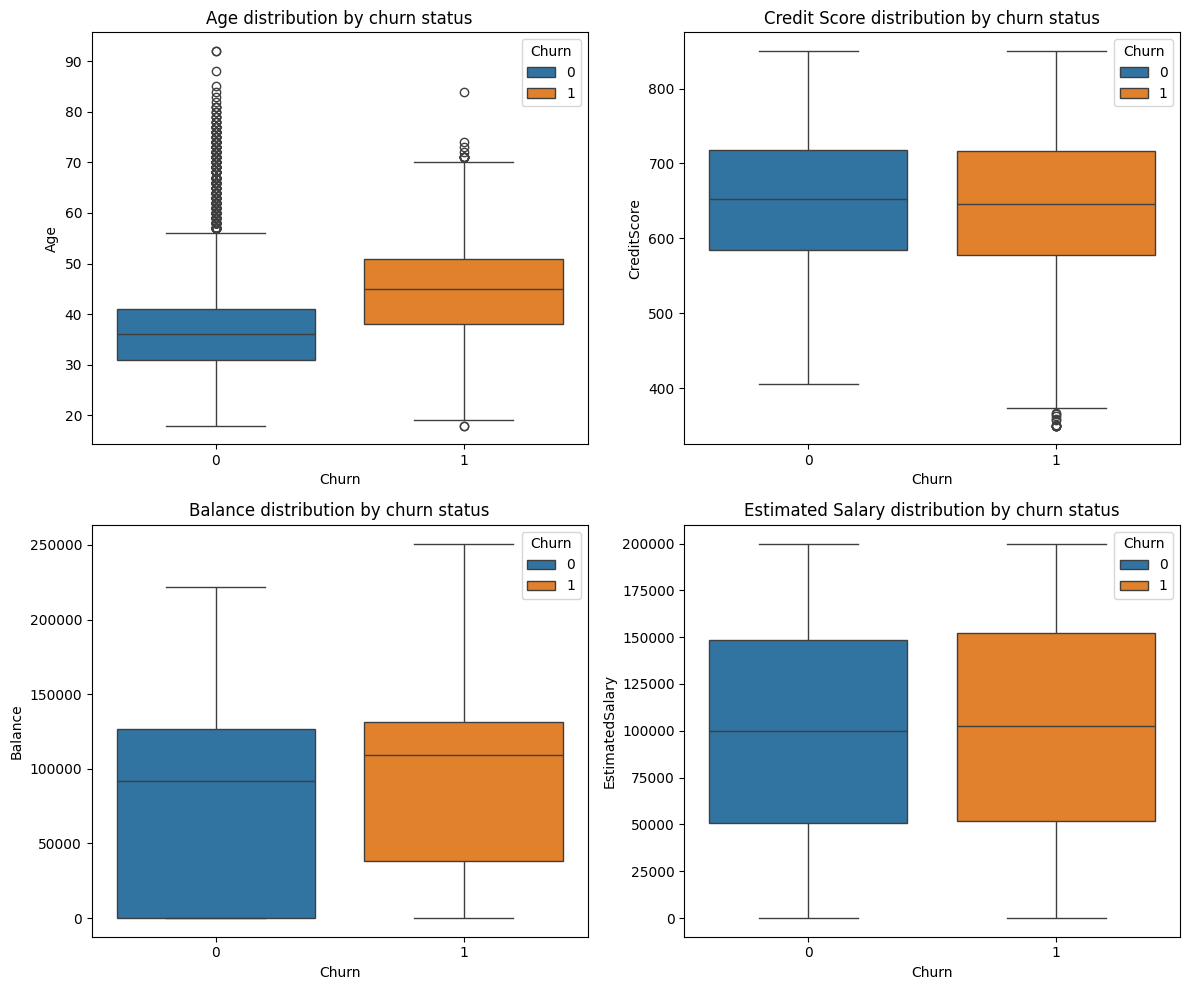

In [124]:
# Boxplot before
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

sns.boxplot(x='Churn', y='Age', hue='Churn', data=churn_dataset, ax=ax[0][0])
ax[0][0].set_title('Age distribution by churn status')
sns.boxplot(x='Churn', y='CreditScore', hue='Churn', data=churn_dataset, ax=ax[0][1])
ax[0][1].set_title('Credit Score distribution by churn status')
sns.boxplot(x='Churn', y='Balance', hue='Churn', data=churn_dataset, ax=ax[1][0])
ax[1][0].set_title('Balance distribution by churn status')
sns.boxplot(x='Churn', y='EstimatedSalary', hue='Churn', data=churn_dataset, ax=ax[1][1])
ax[1][1].set_title('Estimated Salary distribution by churn status')

plt.tight_layout()
plt.show()

[0]No churn [1]Churn

#**Data Preprocessing**

In [125]:
# Label Encoding
churn_dataset.loc[:, 'Geography']=churn_dataset['Geography'].replace({'France': 1, 'Spain': 2, 'Germany': 3})
churn_dataset.loc[:, 'Gender']=churn_dataset['Gender'].replace({'Female': 1, 'Male': 2})

<ipython-input-125-5de5e7ad9333>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_dataset.loc[:, 'Geography']=churn_dataset['Geography'].replace({'France': 1, 'Spain': 2, 'Germany': 3})
<ipython-input-125-5de5e7ad9333>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  churn_dataset.loc[:, 'Gender']=churn_dataset['Gender'].replace({'Female': 1, 'Male': 2})


In [126]:
churn_dataset.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Churn
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


In [127]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [128]:
# Transforming object variables in integer
churn_dataset = churn_dataset.astype({'Geography': 'int64', 'Gender': 'int64'})

In [129]:
churn_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  int64  
 2   Gender           10000 non-null  int64  
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Churn            10000 non-null  int64  
dtypes: float64(2), int64(9)
memory usage: 859.5 KB


<Axes: >

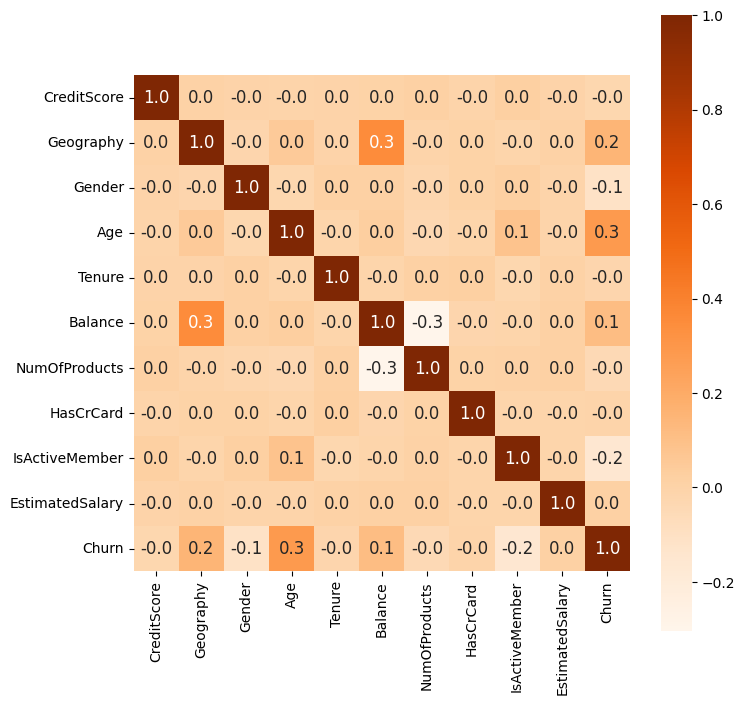

In [130]:
corr = churn_dataset.corr()
plt.figure(figsize=(8,8))
sns.heatmap(corr, cbar=True, square= True, fmt='.1f', annot=True, annot_kws={'size':12}, cmap='Oranges')

#**Handle Inbalanced Dataset**
The minority class is "churn".
It will be 3 techniques for handle inbalanced dataset:

1.   Oversampling
2.   Undersampling
3.   SMOTE

In the end, the accuracy of each model will be measured to decide which of them to use.






Graph showing the inbalanced dataset:

In [131]:
X = churn_dataset.drop('Churn', axis=1)
y = churn_dataset['Churn']

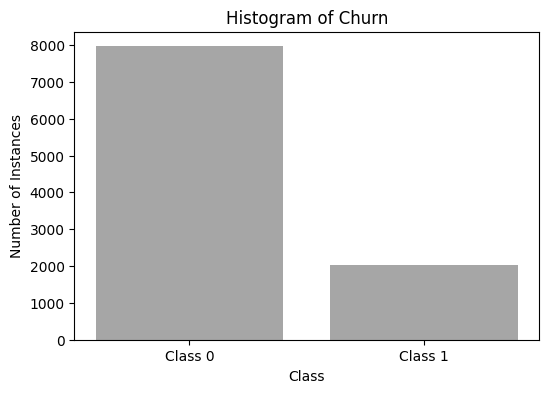

In [132]:
plt.figure(figsize=(6, 4))
plt.hist(y, bins=range(3), align='left', rwidth=0.8, color='grey', alpha=0.7)
plt.title("Histogram of Churn")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(2), ['Class 0', 'Class 1'])
plt.show()

**1. Oversampling**

In [133]:
# Define features and target variable
X = churn_dataset.drop('Churn', axis=1)
y = churn_dataset['Churn']

In [134]:
# Split the dataset into training and testing sets
no_churn = X  # churn_dataset.drop('Exited', axis=1)
churn = y  # churn_dataset['Exited']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [135]:
# Apply oversampling using RandomOverSampler
oversampling_model = RandomOverSampler(sampling_strategy='auto', random_state=42)
X_train_resampled, y_train_resampled = oversampling_model.fit_resample(X_train, y_train)

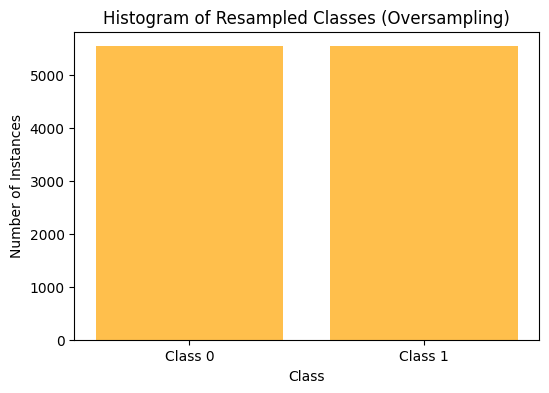

In [170]:
# Vizualization of method
plt.figure(figsize=(6, 4))

plt.hist(y_resampled, bins=range(3), align='left', rwidth=0.8, color='orange', alpha=0.7)
plt.title("Histogram of Resampled Classes (Oversampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(2), ['Class 0', 'Class 1'])

plt.show()



*   Trainning model




In [136]:
# Create a Logistic Regression model
oversampling_model = LogisticRegression()

In [137]:
# Fit the model on the resampled training data
oversampling_model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [138]:
# Make predictions on the training set
y_train_pred = oversampling_model.predict(X_train_resampled)

In [139]:
# Make predictions on the test set
y_test_pred = oversampling_model.predict(X_test)



*   Metrics: mensuring the accuracy of training and test



In [140]:
# Measure accuracy for training and test sets
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

In [141]:
# Print the accuracies
print("Oversampling Training Accuracy:", accuracy_train)
print("Oversampling Test Accuracy:", accuracy_test)

Oversampling Training Accuracy: 0.666396250225347
Oversampling Test Accuracy: 0.636


**2. Undersampling**

In [142]:
# Define features and target variable
X = churn_dataset.drop('Churn', axis=1)
y = churn_dataset['Churn']

In [143]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [144]:
# Undersample the training data
undersampling_model = RandomUnderSampler(random_state=42)
X_train_resampled, y_train_resampled = undersampling_model.fit_resample(X_train, y_train)

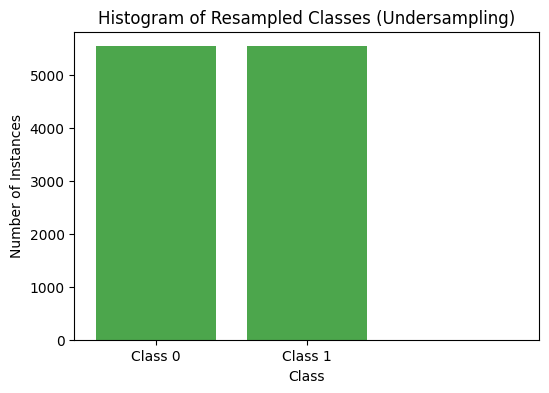

In [166]:
# Vizualization of the method
plt.figure(figsize=(6, 4))

plt.hist(y_resampled, bins=range(4), align='left', rwidth=0.8, color='green', alpha=0.7)
plt.title("Histogram of Resampled Classes (Undersampling)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(2), ['Class 0', 'Class 1'])

plt.show()

In [163]:
# Create a Logistic Regression model
model = LogisticRegression()

In [146]:
# Fit the model on the undersampled training data
model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [147]:
# Make predictions on the training set
y_train_pred = model.predict(X_train_resampled)

In [148]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [149]:
# Measure accuracy for training and test sets
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

In [150]:
# Print the accuracies
print("Undersampling Training Accuracy:", accuracy_train)
print("Undersampling Test Accuracy:", accuracy_test)

Undersampling Training Accuracy: 0.653819683413627
Undersampling Test Accuracy: 0.6436666666666667


**3. SMOTE**

In [151]:
# Define features and target variable
X = churn_dataset.drop('Churn', axis=1)
y = churn_dataset['Churn']

In [152]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [153]:
# Apply SMOTE using SMOTE
smote_model = SMOTE(random_state=42)
X_resampled, y_resampled = smote_model.fit_resample(X_train, y_train)

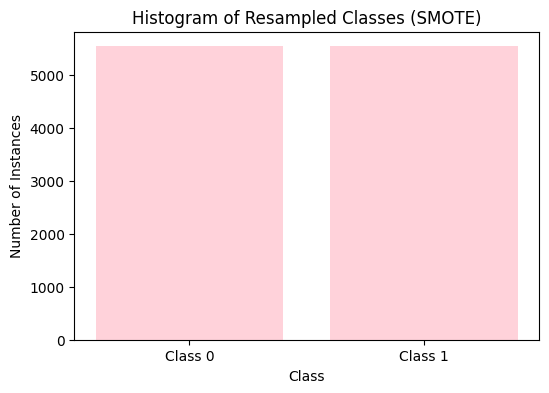

In [169]:
# Vizualitation of the method
plt.figure(figsize=(6, 4))

plt.hist(y_resampled, bins=range(3), align='left', rwidth=0.8, color='pink', alpha=0.7)
plt.title("Histogram of Resampled Classes (SMOTE)")
plt.xlabel("Class")
plt.ylabel("Number of Instances")
plt.xticks(range(2), ['Class 0', 'Class 1'])

plt.show()

In [154]:
# Create a Logistic Regression model
model = LogisticRegression()

In [155]:
# Fit the model on the SMOTE-resampled training data
model.fit(X_train_resampled, y_train_resampled)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [156]:
# Make predictions on the training set
y_train_pred = model.predict(X_train_resampled)

In [157]:
# Make predictions on the test set
y_test_pred = model.predict(X_test)

In [158]:
# Measure accuracy for training and test sets
accuracy_train = accuracy_score(y_train_resampled, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

In [159]:
# Print the accuracies
print("SMOTE Training Accuracy:", accuracy_train)
print("SMOTE Test Accuracy:", accuracy_test)

SMOTE Training Accuracy: 0.653819683413627
SMOTE Test Accuracy: 0.6436666666666667
